In [77]:
from sklearn.datasets import make_blobs
import random
import numpy as np

In [79]:
X, y = make_blobs(n_samples= 100, n_features= 2, centers= [(-5, 5), (5, 5)], cluster_std= [1,1] , random_state = 2)

In [81]:
import matplotlib.pyplot as plt 

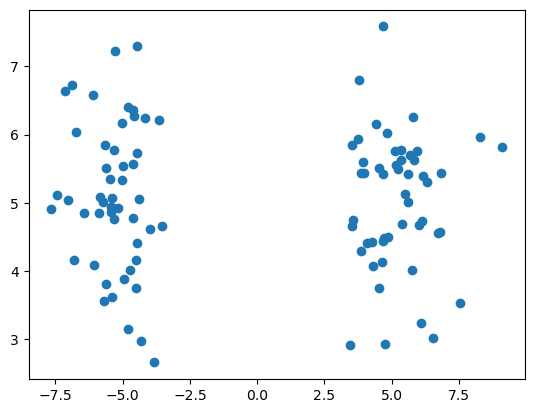

In [83]:
plt.scatter(X[:, 0], X[:, 1])

In [109]:
class CustomKMeans : 

    def __init__(self, n_clusters = 2, max_iter = 100) :
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X) :
        random_indices = (random.sample(range(0 , X.shape[0]) , self.n_clusters))
        self.centroids = X[random_indices]
        for i in range(self.max_iter):
            labels = self._assign_clusters(X)

            new_centroids = self._compute_centroids(X, labels)
        
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

        return labels

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    def _compute_centroids(self, X, labels):
        centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
        return np.array(centroids)
        